In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
df=pd.read_csv("/content/drive/MyDrive/train_final.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.00,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.60,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.00,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.00,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.30,0,0,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,0,31,2017,June,26,27,0,1,1,...,D,D,0,No Deposit,0,Transient,119.00,0,2,2017-06-28
44634,Resort Hotel,0,116,2015,September,39,26,2,5,2,...,E,F,0,No Deposit,0,Transient,93.86,0,0,2015-10-03
44635,City Hotel,1,89,2017,April,14,3,1,2,2,...,A,A,0,No Deposit,0,Transient,99.00,0,1,2017-02-09
44636,City Hotel,0,277,2016,September,37,5,2,5,2,...,A,A,0,No Deposit,0,Transient-Party,89.14,0,1,2016-09-12


In [5]:
df['reserved_room_type'].value_counts()

A    31897
D     7356
E     2488
F     1082
G      784
B      433
C      355
H      241
P        2
Name: reserved_room_type, dtype: int64

In [7]:
df['assigned_room_type'].value_counts()

A    27069
D     9838
E     3022
F     1395
G      972
C      909
B      847
H      285
I      170
K      129
P        2
Name: assigned_room_type, dtype: int64

In [8]:
df['customer_type'].value_counts()

Transient          32982
Transient-Party     9826
Contract            1594
Group                236
Name: customer_type, dtype: int64

In [12]:
df['booking_changes'].value_counts()

0     37386
1      5102
2      1508
3       378
4       161
5        37
6        30
7        13
8         7
13        3
14        3
9         3
10        2
21        1
20        1
17        1
15        1
16        1
Name: booking_changes, dtype: int64

In [32]:
df['meal'].value_counts()

BB           34424
HB            5479
SC            4038
Undefined      445
FB             252
Name: meal, dtype: int64

In [33]:
df['country'].value_counts()

PRT    16999
GBR     4914
FRA     4207
ESP     3382
DEU     2957
       ...  
MRT        1
DMA        1
LCA        1
ETH        1
CAF        1
Name: country, Length: 156, dtype: int64

In [13]:
df['hotel'].value_counts()

City Hotel      29335
Resort Hotel    15303
Name: hotel, dtype: int64

In [24]:
df['deposit_type'].value_counts()

No Deposit    40235
Non Refund     4339
Refundable       64
Name: deposit_type, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [75]:
model = LabelEncoder()
df['reserved_room_type'] = model.fit_transform(df['reserved_room_type'])
df['reserved_room_type']

0        4
1        0
2        5
3        0
4        0
        ..
44633    3
44634    4
44635    0
44636    0
44637    0
Name: reserved_room_type, Length: 44638, dtype: int64

In [76]:
model1 = LabelEncoder()
df['assigned_room_type'] = model.fit_transform(df['assigned_room_type'])
df['assigned_room_type']

0        5
1        0
2        5
3        0
4        0
        ..
44633    3
44634    5
44635    0
44636    0
44637    0
Name: assigned_room_type, Length: 44638, dtype: int64

In [77]:
model3 = LabelEncoder()
df['country'] = model3.fit_transform(df['country'])
df['country']

0        121
1         12
2         71
3         46
4         38
        ... 
44633     75
44634     53
44635    121
44636    110
44637    121
Name: country, Length: 44638, dtype: int64

In [78]:
df = pd.get_dummies(df,columns = ['hotel'])

In [79]:
df = pd.get_dummies(df,columns = ['meal'])

In [19]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,3,2016,February,7,12,0,2,2,0.0,...,0,No Deposit,0,Transient,81.00,1,0,2016-02-14,0,1
1,1,50,2016,November,47,18,1,2,2,0.0,...,0,No Deposit,0,Transient,93.60,0,2,2016-10-09,1,0
2,0,14,2015,September,37,7,1,5,2,2.0,...,0,No Deposit,0,Contract,166.00,0,3,2015-09-13,1,0
3,0,18,2015,December,50,6,2,0,2,0.0,...,0,No Deposit,0,Transient,107.00,0,0,2015-12-08,1,0
4,1,263,2016,September,40,29,2,4,2,0.0,...,0,No Deposit,0,Transient,100.30,0,0,2016-01-18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,0,31,2017,June,26,27,0,1,1,0.0,...,0,No Deposit,0,Transient,119.00,0,2,2017-06-28,1,0
44634,0,116,2015,September,39,26,2,5,2,0.0,...,0,No Deposit,0,Transient,93.86,0,0,2015-10-03,0,1
44635,1,89,2017,April,14,3,1,2,2,0.0,...,0,No Deposit,0,Transient,99.00,0,1,2017-02-09,1,0
44636,0,277,2016,September,37,5,2,5,2,0.0,...,0,No Deposit,0,Transient-Party,89.14,0,1,2016-09-12,1,0


In [80]:
df = pd.get_dummies(df,columns = ['deposit_type'])
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,3,2016,February,7,12,0,2,2,0.0,...,0,1,1,0,0,0,0,1,0,0
1,1,50,2016,November,47,18,1,2,2,0.0,...,1,0,1,0,0,0,0,1,0,0
2,0,14,2015,September,37,7,1,5,2,2.0,...,1,0,1,0,0,0,0,1,0,0
3,0,18,2015,December,50,6,2,0,2,0.0,...,1,0,1,0,0,0,0,1,0,0
4,1,263,2016,September,40,29,2,4,2,0.0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,0,31,2017,June,26,27,0,1,1,0.0,...,1,0,1,0,0,0,0,1,0,0
44634,0,116,2015,September,39,26,2,5,2,0.0,...,0,1,1,0,0,0,0,1,0,0
44635,1,89,2017,April,14,3,1,2,2,0.0,...,1,0,0,0,0,1,0,1,0,0
44636,0,277,2016,September,37,5,2,5,2,0.0,...,1,0,0,0,1,0,0,1,0,0


In [81]:
model2 = LabelEncoder()
df['customer_type'] = model2.fit_transform(df['customer_type'])
df['customer_type']

0        2
1        2
2        0
3        2
4        2
        ..
44633    2
44634    2
44635    2
44636    3
44637    3
Name: customer_type, Length: 44638, dtype: int64

In [85]:
X = df.drop(['is_canceled','arrival_date_month','arrival_date_year','reservation_status_date'],axis = 1)
y = df['is_canceled']
X

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,3,7,12,0,2,2,0.0,0,121,0,...,0,0,1,0,0,0,0,1,0,0
1,50,47,18,1,2,2,0.0,0,12,0,...,0,0,0,0,0,1,0,0,0,1
2,14,37,7,1,5,2,2.0,0,71,0,...,0,0,0,0,0,1,0,0,0,1
3,18,50,6,2,0,2,0.0,0,46,0,...,0,0,0,0,0,1,0,0,0,1
4,263,40,29,2,4,2,0.0,0,38,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,31,26,27,0,1,1,0.0,0,75,0,...,0,0,0,0,0,1,0,0,0,1
44634,116,39,26,2,5,2,0.0,0,53,0,...,0,0,0,0,0,1,0,0,0,1
44635,89,14,3,1,2,2,0.0,0,121,0,...,0,0,0,0,0,1,0,0,0,1
44636,277,37,5,2,5,2,0.0,0,110,0,...,0,0,0,0,1,0,0,0,0,1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,accuracy,recall,presicion
0,1,0.785768,0.630613,0.648139
1,2,0.817130,0.790992,0.510454
2,3,0.798014,0.671650,0.607088
3,4,0.811305,0.768579,0.508924
4,5,0.799283,0.689846,0.571647
5,6,0.806004,0.750568,0.505609
6,7,0.798536,0.698187,0.549720
7,8,0.805332,0.750476,0.502295
8,9,0.800553,0.711818,0.535951
9,10,0.803166,0.750000,0.491841


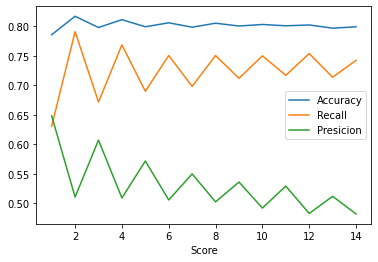

In [88]:
plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()

In [40]:
X_train['market_segment'].value_counts()

Online TA        15012
Offline TA/TO     6323
Groups            4792
Direct            3435
Corporate         1417
Complementary      210
Aviation            57
Name: market_segment, dtype: int64

In [82]:
df = pd.get_dummies(df,columns = ['market_segment'])
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,0,3,2016,February,7,12,0,2,2,0.0,...,1,0,0,0,0,0,1,0,0,0
1,1,50,2016,November,47,18,1,2,2,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,14,2015,September,37,7,1,5,2,2.0,...,1,0,0,0,0,0,0,0,0,1
3,0,18,2015,December,50,6,2,0,2,0.0,...,1,0,0,0,0,0,0,0,0,1
4,1,263,2016,September,40,29,2,4,2,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,0,31,2017,June,26,27,0,1,1,0.0,...,1,0,0,0,0,0,0,0,0,1
44634,0,116,2015,September,39,26,2,5,2,0.0,...,1,0,0,0,0,0,0,0,0,1
44635,1,89,2017,April,14,3,1,2,2,0.0,...,1,0,0,0,0,0,0,0,0,1
44636,0,277,2016,September,37,5,2,5,2,0.0,...,1,0,0,0,0,0,0,0,1,0


In [83]:
df['distribution_channel'].value_counts()

TA/TO        36298
Direct        5722
Corporate     2535
GDS             83
Name: distribution_channel, dtype: int64

In [84]:
df = pd.get_dummies(df,columns = ['distribution_channel'])
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,0,3,2016,February,7,12,0,2,2,0.0,...,0,0,1,0,0,0,0,1,0,0
1,1,50,2016,November,47,18,1,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0,14,2015,September,37,7,1,5,2,2.0,...,0,0,0,0,0,1,0,0,0,1
3,0,18,2015,December,50,6,2,0,2,0.0,...,0,0,0,0,0,1,0,0,0,1
4,1,263,2016,September,40,29,2,4,2,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,0,31,2017,June,26,27,0,1,1,0.0,...,0,0,0,0,0,1,0,0,0,1
44634,0,116,2015,September,39,26,2,5,2,0.0,...,0,0,0,0,0,1,0,0,0,1
44635,1,89,2017,April,14,3,1,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
44636,0,277,2016,September,37,5,2,5,2,0.0,...,0,0,0,0,1,0,0,0,0,1


In [89]:
knn1 = KNeighborsClassifier(3)
knn1.fit(X_train,y_train)
answer = knn1.predict(X_test)
answer

array([0, 0, 0, ..., 0, 1, 0])

In [90]:
df1=pd.read_csv("/content/drive/MyDrive/test_final.csv")
df1

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,City Hotel,180,2016,May,22,23,1,5,2,0.0,...,A,A,0,No Deposit,0,Transient,80.75,0,0,2016-05-29
23521,City Hotel,4,2016,November,45,1,0,3,1,0.0,...,A,A,0,No Deposit,0,Transient,65.00,0,1,2016-11-04
23522,City Hotel,3,2016,May,21,16,1,1,1,0.0,...,A,A,0,No Deposit,0,Transient,65.00,0,0,2016-05-18
23523,Resort Hotel,312,2017,March,10,5,2,5,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,30.00,0,0,2017-01-11


In [91]:
model = LabelEncoder()
df1['reserved_room_type'] = model.fit_transform(df1['reserved_room_type'])
df1['reserved_room_type']

0        0
1        0
2        0
3        1
4        0
        ..
23520    0
23521    0
23522    0
23523    0
23524    3
Name: reserved_room_type, Length: 23525, dtype: int64

In [92]:
model1 = LabelEncoder()
df1['assigned_room_type'] = model.fit_transform(df1['assigned_room_type'])
df1['assigned_room_type']

0        0
1        0
2        0
3        1
4        0
        ..
23520    0
23521    0
23522    0
23523    0
23524    3
Name: assigned_room_type, Length: 23525, dtype: int64

In [93]:
model3 = LabelEncoder()
df1['country'] = model3.fit_transform(df1['country'])
df1['country']

0        22
1        94
2        94
3        29
4        94
         ..
23520    29
23521    94
23522    94
23523    94
23524    94
Name: country, Length: 23525, dtype: int64

In [94]:
df1 = pd.get_dummies(df1,columns = ['hotel'])

In [95]:
df1 = pd.get_dummies(df1,columns = ['meal'])

In [96]:
df1 = pd.get_dummies(df1,columns = ['deposit_type'])
df1

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,73,2016,July,28,6,0,2,1,0.0,0,...,1,0,0,0,0,1,0,1,0,0
1,37,2015,October,43,24,2,5,1,1.0,0,...,1,0,0,0,0,1,0,1,0,0
2,190,2017,April,14,6,2,3,2,0.0,0,...,1,0,1,0,0,0,0,1,0,0
3,287,2016,August,35,24,1,4,2,0.0,0,...,1,0,1,0,0,0,0,1,0,0
4,386,2016,October,43,20,1,3,2,0.0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,180,2016,May,22,23,1,5,2,0.0,0,...,1,0,1,0,0,0,0,1,0,0
23521,4,2016,November,45,1,0,3,1,0.0,0,...,1,0,1,0,0,0,0,1,0,0
23522,3,2016,May,21,16,1,1,1,0.0,0,...,1,0,1,0,0,0,0,1,0,0
23523,312,2017,March,10,5,2,5,2,0.0,0,...,0,1,1,0,0,0,0,1,0,0


In [97]:
model2 = LabelEncoder()
df1['customer_type'] = model2.fit_transform(df1['customer_type'])
df1['customer_type']

0        2
1        2
2        2
3        2
4        3
        ..
23520    2
23521    2
23522    2
23523    3
23524    2
Name: customer_type, Length: 23525, dtype: int64

In [98]:
df1 = pd.get_dummies(df1,columns = ['market_segment'])

In [99]:
df1 = pd.get_dummies(df1,columns = ['distribution_channel'])

In [100]:
X = df1.drop(['arrival_date_month','arrival_date_year','reservation_status_date'],axis = 1)
X

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,73,28,6,0,2,1,0.0,0,22,0,...,0,0,0,0,0,1,0,0,0,1
1,37,43,24,2,5,1,1.0,0,94,0,...,0,0,0,0,0,1,0,0,0,1
2,190,14,6,2,3,2,0.0,0,94,0,...,0,0,0,0,0,1,0,0,0,1
3,287,35,24,1,4,2,0.0,0,29,0,...,0,0,1,0,0,0,0,1,0,0
4,386,43,20,1,3,2,0.0,0,94,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,180,22,23,1,5,2,0.0,0,29,0,...,0,0,0,0,1,0,0,0,0,1
23521,4,45,1,0,3,1,0.0,0,94,1,...,0,1,0,0,0,0,1,0,0,0
23522,3,21,16,1,1,1,0.0,0,94,0,...,0,1,0,0,0,0,1,0,0,0
23523,312,10,5,2,5,2,0.0,0,94,0,...,0,0,0,1,0,0,0,0,0,1


In [101]:
result = knn1.predict(X)
result

array([0, 0, 0, ..., 0, 1, 0])

In [107]:
df = pd.DataFrame(result,columns = ["is_canceled"])
df= df.reset_index()
df.to_csv("name.csv",index = False)